In [1]:
from kan import *
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1], grid=3, k=3, seed=2, device=device)
f = lambda x: torch.exp(torch.special.bessel_j0(20*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

cuda
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.15e-01 | test_loss: 5.85e-01 | reg: 5.84e+00 | : 100%|█| 20/20 [00:01<00:00, 11.06it

saving model version 0.1


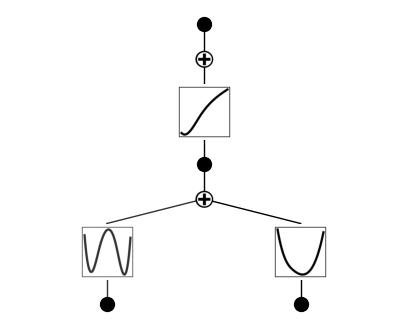

In [2]:
model.plot()

In [3]:
model = model.refine(20)
model.fit(dataset, opt="LBFGS", steps=20);

saving model version 0.2


| train_loss: 1.52e-02 | test_loss: 6.23e-02 | reg: 7.50e+00 | : 100%|█| 20/20 [00:01<00:00, 12.44it


saving model version 0.3


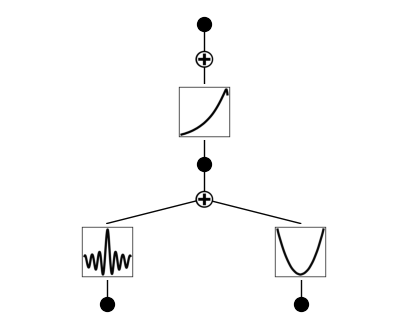

In [4]:
model.plot()

In [5]:
model.suggest_symbolic(1,0,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0      x^2    0.996739 -8.256171           2                2   -0.051234
1      sin    0.996635 -8.211084           2                2   -0.042217
2      cos    0.996621 -8.205133           2                2   -0.041027
3        0    0.000000  0.000014           0                0    0.000003
4        x    0.925120 -3.739085           1                1    0.052183


('x^2',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  2,
  <function kan.utils.<lambda>(x, y_th)>),
 np.float64(0.9967392683029175),
 np.int64(2))

In [6]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', 'x^5', '1/x', '1/x^2', '1/x^3', '1/x^4', '1/x^5', 'sqrt', 'x^0.5', 'x^1.5', '1/sqrt(x)', '1/x^0.5', 'exp', 'log', 'abs', 'sin', 'cos', 'tan', 'tanh', 'sgn', 'arcsin', 'arccos', 'arctan', 'arctanh', '0', 'gaussian'])

In [7]:
add_symbolic('J0', torch.special.bessel_j0, c=1)

In [8]:
# J0 fitting is not very good
model.suggest_symbolic(0,0,0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1       J0    0.198260 -0.318776           1                1    0.736245
2        x    0.001542 -0.002211           1                1    0.799558
3      cos    0.161470 -0.254048           2                2    1.549190
4      sin    0.161470 -0.254048           2                2    1.549190


('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 np.float64(0.0),
 np.int64(0))

In [9]:
model.suggest_symbolic(0,0,0,a_range=(-40,40))

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       J0    0.998930 -9.854404           1                1   -1.170881
1        0    0.000000  0.000014           0                0    0.000003
2        x    0.001542 -0.002211           1                1    0.799558
3      cos    0.585208 -1.269506           2                2    1.346099
4      sin    0.585208 -1.269506           2                2    1.346099


('J0',
 (<function torch._C._special.special_bessel_j0>,
  J0,
  1,
  <function torch._C._special.special_bessel_j0>),
 np.float64(0.9989297389984131),
 np.int64(1))

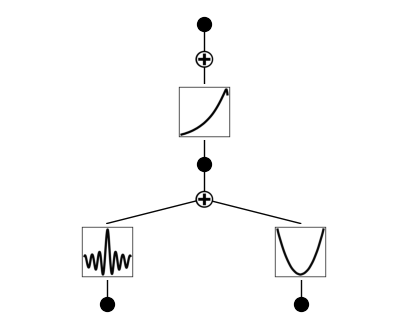

In [10]:
model.plot()